<a href="https://colab.research.google.com/github/1eg1on/NLA-RL/blob/main/Actor_Critic_FP_NLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download**

In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 92kB 4.9MB/s 


In [2]:

%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0


TensorFlow 1.x selected.
     |████████████████████████████████| 256kB 7.2MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


In [3]:
!pip install tensorly
!pip install tensorly-torch

     |████████████████████████████████| 112kB 6.4MB/s 
     |████████████████████████████████| 163kB 14.4MB/s 
  Created wheel for tensorly: filename=tensorly-0.5.1-cp36-none-any.whl size=149171 sha256=d7ebd0a4deaea16f04850d3bd99f072888ff2d731e0012104078fc57a6d31aa0
  Stored in directory: /root/.cache/pip/wheels/88/1e/e7/b9677b2046cc87e17931b4b5781941786d3ee647825ca40ea6
Successfully built tensorly
  Created wheel for tensorly-torch: filename=tensorly_torch-0.1.0-cp36-none-any.whl size=35506 sha256=17bdab2eb4e7ea08abfbe14f34aff88ccd38b156111d7985fe4bd45d9bab0230
  Stored in directory: /root/.cache/pip/wheels/ad/29/14/b3714abe0a0b81fa1e8bd212ffdd411a5fb2996d999b4f9741
Successfully built tensorly-torch


**Import**

In [4]:
from stable_baselines.common.cmd_util import make_atari_env
from stable_baselines.common.policies import CnnPolicy
from stable_baselines.common.vec_env import VecFrameStack
from stable_baselines import A2C

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [5]:
from google.colab import files

In [6]:
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

In [7]:
import numpy as np
import gym
import pickle 
import tensorly as tl
import tensorly.decomposition as tldec

In [8]:
import tensorly as tl
import tensorly.decomposition as tldec

**Steps**

In [9]:
files.upload()
print("done")

Saving breakout_a2c.pkl to breakout_a2c.pkl
done


In [10]:
model = A2C.load("breakout_a2c.pkl", lr_schedule='constant', verbose=1)

Loading a model without an environment, this model cannot be trained until it has a valid environment.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




In [11]:
env_1 = make_atari_env('BreakoutNoFrameskip-v4', num_env=1, seed=0)
env_1 = VecFrameStack(env_1, n_stack=4)

In [12]:
model.set_env(env_1)

In [13]:
model.learn(total_timesteps=int(1e3))

---------------------------------
| explained_variance | -4.2     |
| fps                | 12       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 0.0556   |
---------------------------------


In [14]:
state=env_1.reset()

In [15]:
action =model.predict(state)[0][0]
action

3

array([433.], dtype=float32)

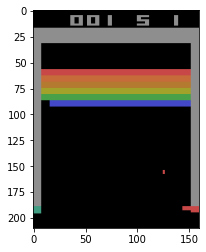

In [16]:
state=env_1.reset()
images = []
true_reward=0
img = plt.imshow(env_1.render('rgb_array')) # only call this once
for _ in range(10000):
     #img.set_data(env_1.render('rgb_array')) # just update the data
     #images.append(env_1.render('rgb_array'))
     #display.display(plt.gcf())
     #display.clear_output(wait=True)
     action = model.predict(state)
     state_next, reward, done, _ =env_1.step(action)
     state=state_next
     true_reward+=reward
true_reward


In [17]:
true_reward

array([433.], dtype=float32)

In [18]:
#imageio.mimsave('atari.gif', images)

In [19]:
with open('breakout_a2c.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [20]:
b[0]

{'_vectorize_action': False,
 'action_space': Discrete(4),
 'alpha': 0.99,
 'ent_coef': 0.01,
 'epsilon': 1e-05,
 'gamma': 0.99,
 'learning_rate': 0.0007,
 'lr_schedule': 'constant',
 'max_grad_norm': 0.5,
 'n_envs': 16,
 'n_steps': 5,
 'observation_space': Box(0, 255, (84, 84, 4), uint8),
 'policy': stable_baselines.common.policies.CnnPolicy,
 'verbose': 1,
 'vf_coef': 0.25}

In [21]:
weights=b[1]

In [22]:
b[1][0].shape, b[1][1].shape, b[1][2].shape,b[1][3].shape,b[1][4].shape,b[1][5].shape,b[1][6].shape,b[1][7].shape

((8, 8, 4, 32),
 (1, 32, 1, 1),
 (4, 4, 32, 64),
 (1, 64, 1, 1),
 (3, 3, 64, 64),
 (1, 64, 1, 1),
 (3136, 512),
 (512,))

CP decomposition of the last CNN layer

In [23]:
b[1][4].shape

(3, 3, 64, 64)

Text(0, 0.5, 'Approximation error')

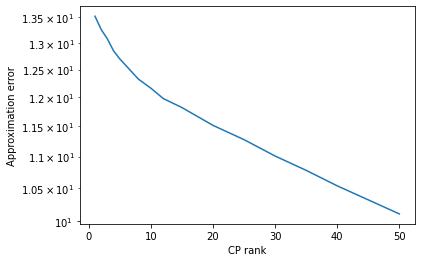

In [24]:
tensor = tl.tensor(b[1][4])
# tensor = tl.random.cp_tensor(shape=(3,3,3), rank=3, full=True)
rank_range = [1, 2, 3, 4, 5, 8, 10, 12, 15,20,25,30,35,40,50]
error_rec = []
layers=[]
for r in rank_range:
    factors = tldec.parafac(tensor.astype("f"), rank=r);
    layers.append(tl.kruskal_to_tensor(factors))
    error_rec.append(np.linalg.norm(tl.kruskal_to_tensor(factors) - tensor));
plt.semilogy(rank_range, error_rec)
plt.xlabel("CP rank")
plt.ylabel("Approximation error")

In [25]:
env_1.reset();

**Performance evaluation(without fine-tuning)**

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained unti

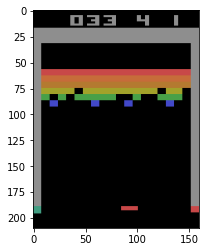

In [26]:
bricks=[]
for j in layers:
  b[1][4]=j
  with open('filename.pkl', 'wb') as handle_w:
      pickle.dump(b, handle_w, protocol=pickle.HIGHEST_PROTOCOL)
  model = A2C.load("filename.pkl", lr_schedule='constant', verbose=1)
  model.set_env(env_1)
  #model.learn(total_timesteps=int(1e2))
  env_1.reset()
  state=env_1.reset()
  rewards=0
  total_reward=0
  img = plt.imshow(env_1.render('rgb_array')) # only call this once
  for _ in range(10000):
      # img.set_data(env_1.render('rgb_array')) # just update the data
      # display.display(plt.gcf())
      # display.clear_output(wait=True)
      action = model.predict(state)
      state_next, reward, done, _ =env_1.step(action)
      rewards+=reward
      total_reward+=1
      state=state_next
  bricks.append(rewards)

In [27]:
rewards

array([428.], dtype=float32)

In [28]:
#imageio.mimsave('atari_0.gif', images)

Text(0, 0.5, 'Reward, %')

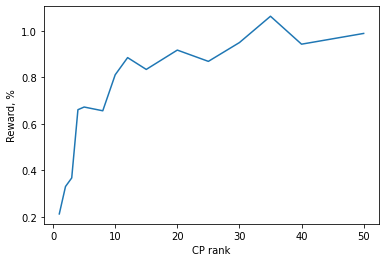

In [29]:
plt.plot(rank_range, bricks/true_reward)
plt.xlabel("CP rank")
plt.ylabel("Reward, %")